In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 仿射变换不能任意改变平行四边形,透射变换可以改变平行四边形为梯形(仿射是透射的子集)
# https://blog.csdn.net/Ibelievesunshine/article/details/105173829

In [2]:
img = cv2.imread('../data/linna.jpg')

In [3]:
# 仿射变换api
'''
warpAffine(src, M, dsize(输出的大小)[, 
            dst[, flags(和插值中的一样)[, borderMode(边界外推标志)[, borderValue(边界填充值)]]]]) -> dst

'''


'\nwarpAffine(src, M, dsize(输出的大小)[, \n            dst[, flags(和插值中的一样)[, borderMode(边界外推标志)[, borderValue(边界填充值)]]]]) -> dst\n\n'

In [4]:
# 平移及缩放矩阵
'''
矩阵中的每个像素都有(x,y)坐标
假设沿着x轴平移tx,沿着y轴平移ty
X,Y = x+tx, y+ty
写成矩阵形式就是
|X|   |1,0,tx|  |x|
|Y| = |0,1,ty|  |y| 
|1|   |0,0, 1|  |1|
xy对应的那两个1 对应了xy的缩放系数
'''

'\n矩阵中的每个像素都有(x,y)坐标\n假设沿着x轴平移tx,沿着y轴平移ty\nX,Y = x+tx, y+ty\n写成矩阵形式就是\n|X|   |1,0,tx|  |x|\n|Y| = |0,1,ty|  |y| \n|1|   |0,0, 1|  |1|\nxy对应的那两个1 对应了xy的缩放系数\n'

(2, 3) float32


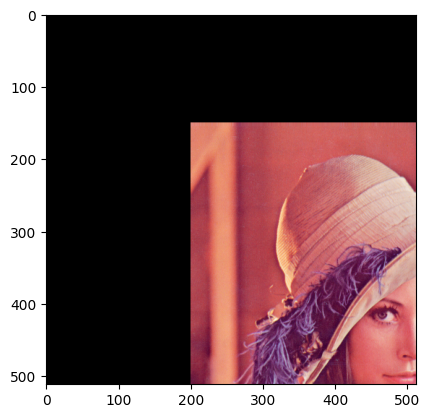

In [24]:
M = np.array([[1,0,200],[0,1,150]],dtype=np.float32) # 必须是float32
print(M.shape,M.dtype) # 注意 cv2 api 要求的变换矩阵shape是2,3 公式的最后一行不要
# 注意 输出的大小 原点还是原图的原点,然后不在这个窗口范围内的图片就不显示了
new_img = cv2.warpAffine(img,M,dsize=(512,512)) 
cv2.imshow('cv2',new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [5]:
# 仿射变化的难点就是变换矩阵的获取 特别是旋转操作的时候
# opencv提供了一个接口来获取变换矩阵
# getRotationMatrix2D(center, angle, scale) -> retval
# center 你要旋转的时候旋转中心,
# angle 旋转多少角度
# scale 缩放系数

[[ 3.21653300e-01  8.61867420e-02  1.51592949e+02]
 [-8.61867420e-02  3.21653300e-01  1.95720561e+02]]


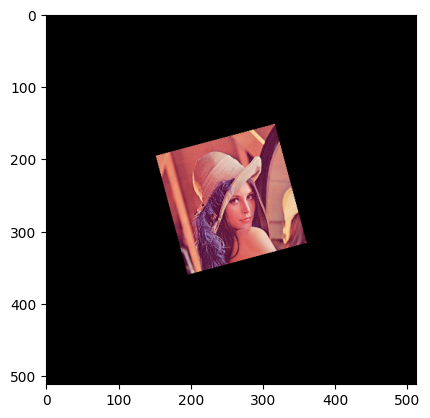

In [6]:
# 例子 对linna图像以图像中心为旋转中心,逆时针旋转15度,缩小1/3
h,w = img.shape[:2]
cx,cy = w/2.0,h//2 # cx cy不是必须是整数
M = cv2.getRotationMatrix2D(center=(cx,cy), angle=15, scale=0.333)
print(M)
new_img = cv2.warpAffine(img,M,dsize=(512,512)) 
cv2.imshow('cv2',new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

[[ 2.68190476e+00 -6.50158730e-01 -2.78755556e+02]
 [ 7.31428571e-01  2.92571429e+00 -6.65600000e+02]]


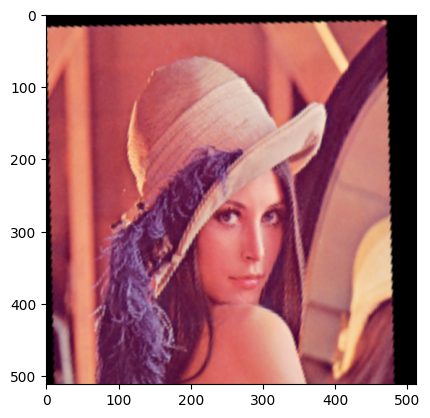

In [8]:
# 仿射变换
# 获取仿射变换的变换矩阵
# 前提 知道原图某三个点的坐标,也知道这三个点要变换到什么位置
# 比如上图 选择图片的左上(150,190),左下(190,355)和右下(370,310)3个点(目测估计的,不准) ,
# 他在原图的坐标是(0,0),(0,512),(512,512)
src = np.array([[150,190],[190,355],[370,310]],dtype =np.float32)
dst = np.array([[0,0],[0,512],[512,512]],dtype =np.float32)
M = cv2.getAffineTransform(src,dst)
print(M)
ex_img = new_img.copy() # 一定要先运行上面那个单元格,保证 new_img 是正确的
img2 = cv2.warpAffine(ex_img,M,dsize=(512,512)) 
cv2.imshow('cv2',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [12]:
# 透视变换 与仿射变换类似,不同的是需要4个点来求解M(3,3)矩阵  仿射变换是M(2,3)
img_ex001 = cv2.imread('./ex001.png')

![ex001](./ex001.png)

[[ 2.44485633e+00  5.01508991e-01 -2.35395783e+02]
 [-9.82736368e-02  2.65338819e+00 -1.37583092e+02]
 [-3.27578789e-04  3.01018609e-03  1.00000000e+00]]


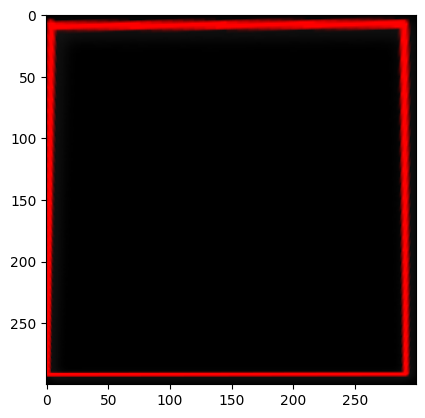

In [23]:
# 获取变换矩阵 getPerspectiveTransform(src, dst[, solveMethod]) -> retval
src = np.float32([[85,55],[45,250],[250,250],[220,60]])
dst = np.float32([[0,0],[0,300],[300,300],[300,0]])
M = cv2.getPerspectiveTransform(src,dst)
print(M)

# 应用透视变换
res = cv2.warpPerspective(img_ex001,M,(300,300))
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))